In [2]:
import LoadingDataset
import utils
import models
import config

GPUs Avaliable[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]:


In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

X_dataset=list()

IMG_SIZE=config.IMG_SIZE
data_type=config.data_type
show_detail=config.show_detail
IMG_DIR = config.IMG_DIR[data_type]
    
df = pd.read_csv(config.data_csv_path[data_type])
for i in tqdm(range(df.shape[0])):
    img = image.load_img(utils.join_path(IMG_DIR ,df['path'][i]),target_size=IMG_SIZE)
    img = image.img_to_array(img)
    X_dataset.append(img)

X = np.array(X_dataset)
y = np.array(df.drop(['path'],axis=1))

# split the data into 70% as training set and 30% as testing set
X_train, X_test ,y_train , y_test = train_test_split(X,y,random_state=config.R_SEED,test_size=0.3,shuffle = True)



100%|██████████| 2000/2000 [00:21<00:00, 93.99it/s] 


In [4]:
from tensorflow.keras.utils import Sequence
import numpy as np   

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

train_gen = DataGenerator(X_train, y_train, 32)
test_gen = DataGenerator(X_test, y_test, 32)

In [5]:
model = models.create_model(128,64,0.1,0.1,False)

MobileNet Model Created.
Model: "Custom_MobileNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 Data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                  

In [7]:
# history,predictions = models.run_through(model, X_train, y_train, X_test, y_test, \
                                         # lr=config.learning_rate, epochs=5, BATCH_SIZE=8)

import tensorflow as tf
    
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-04),loss = tf.keras.losses.binary_crossentropy, metrics=["accuracy"])
    
loss0,accuracy0 = model.evaluate(x=X_test,y=y_test,batch_size=8)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

history = model.fit(train_gen,
                    epochs=6,
                    validation_data=test_gen)

# history = model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test,y_test), batch_size=8)

# predictions = model.predict(x=X_test)

75/75 [==============================] - 11s 29ms/step - loss: 0.9251 - accuracy: 0.5217
initial loss: 0.93
initial accuracy: 0.52
Epoch 1/6
44/44 [==============================] - 23s 411ms/step - loss: 0.2497 - accuracy: 0.9450 - val_loss: 0.1996 - val_accuracy: 0.9383
Epoch 2/6
44/44 [==============================] - 17s 378ms/step - loss: 0.1458 - accuracy: 0.9850 - val_loss: 0.1255 - val_accuracy: 0.9800
Epoch 3/6
44/44 [==============================] - 16s 373ms/step - loss: 0.1144 - accuracy: 0.9929 - val_loss: 0.1032 - val_accuracy: 0.9817
Epoch 4/6
44/44 [==============================] - 16s 370ms/step - loss: 0.0961 - accuracy: 0.9971 - val_loss: 0.0959 - val_accuracy: 0.9883
Epoch 5/6
44/44 [==============================] - 18s 413ms/step - loss: 0.0824 - accuracy: 0.9979 - val_loss: 0.0886 - val_accuracy: 0.9883
Epoch 6/6
44/44 [==============================] - 18s 401ms/step - loss: 0.0736 - accuracy: 0.9986 - val_loss: 0.0812 - val_accuracy: 0.9867


In [5]:
predictions = model.predict(X_test)

19/19 [==============================] - 17s 144ms/step


              precision    recall  f1-score   support

         Dog       0.98      0.99      0.99       292
         Cat       0.99      0.98      0.99       308

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



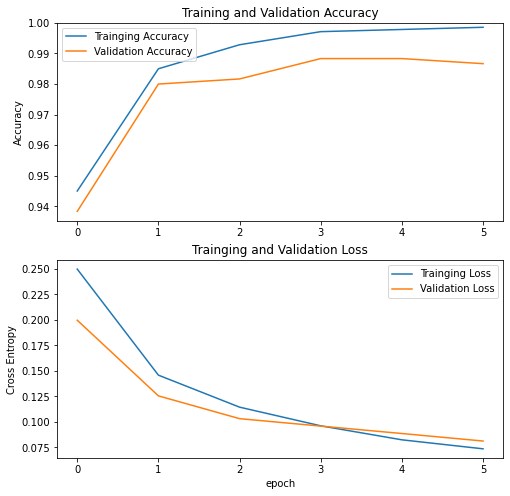

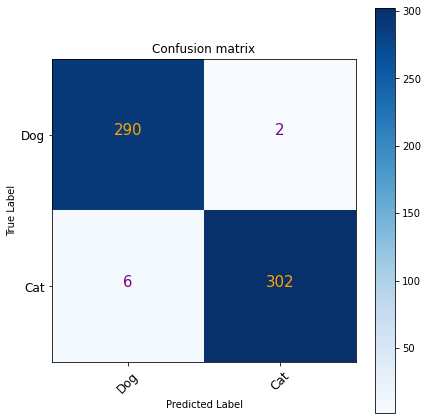

In [9]:
models.show_performance(history, predictions, X_train, y_train, X_test, y_test,\
                        save_in_csv=False, note="Testing if fuction working properly")

In [ ]:
model.save('D:/111project/github/041-111project/Models/CatnDog_Mobi')

In [4]:
import tensorflow as tf
import keras

model = tf.keras.models.load_model('D:/111project/github/041-111project/Models/CatnDog_MobileNet.h5')

In [7]:
print(predictions)

[[5.3305586e-04 9.9946696e-01]
 [9.9656469e-01 3.4353831e-03]
 [1.9465523e-03 9.9805343e-01]
 ...
 [3.0363182e-04 9.9969637e-01]
 [9.9580330e-01 4.1967742e-03]
 [3.6024302e-03 9.9639755e-01]]


In [6]:
import numpy as np
y_pred=np.argmax(predictions,axis=-1)
y_true=np.argmax(y_test,axis=-1)

for index in range(len(y_pred)):
    if y_pred[index] == y_true[index]:
        print("index:{}  True".format(index))
    else:
        print("index:{}  False".format(index))

index:0  True
index:1  True
index:2  True
index:3  True
index:4  True
index:5  True
index:6  True
index:7  True
index:8  True
index:9  True
index:10  True
index:11  True
index:12  True
index:13  True
index:14  True
index:15  True
index:16  True
index:17  True
index:18  True
index:19  True
index:20  True
index:21  True
index:22  True
index:23  True
index:24  True
index:25  True
index:26  True
index:27  True
index:28  True
index:29  True
index:30  True
index:31  True
index:32  True
index:33  True
index:34  True
index:35  True
index:36  True
index:37  True
index:38  True
index:39  True
index:40  True
index:41  True
index:42  True
index:43  True
index:44  True
index:45  True
index:46  True
index:47  True
index:48  True
index:49  True
index:50  True
index:51  False
index:52  True
index:53  True
index:54  True
index:55  True
index:56  True
index:57  True
index:58  True
index:59  True
index:60  True
index:61  True
index:62  True
index:63  True
index:64  True
index:65  True
index:66  True
inde

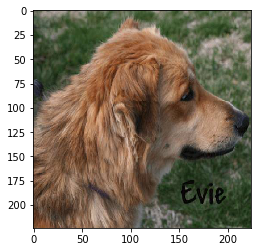

1/1 [==============================] - 0s 26ms/step
[0]


In [33]:
img = image.load_img('C:\\Users\\123XX\\OneDrive\\桌面\\dog.1422.jpg',target_size=IMG_SIZE)
img = image.img_to_array(img)
img = np.array(img)

import matplotlib.pyplot as plt
rimg = img/255.
plt.imshow(rimg, interpolation='nearest')
plt.show()

img = np.expand_dims(img,axis=0)
# np.shape(img)
pred = model.predict(img)

pred = np.argmax(pred,axis=-1)
print(pred)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


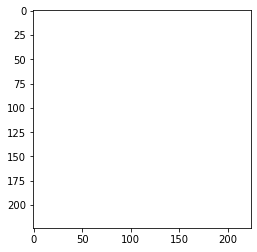

In [21]:
img_plot = plt.imshow(img)